In [2]:
# Core libraries
import pandas as pd
import numpy as np

# Preprocessing & model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model saving
import joblib

# Display options
pd.set_option('display.max_columns', None)


In [3]:
# Load Heart Disease Risk Dataset (EarlyMed)
heart_df = pd.read_csv("heart_disease_risk_dataset_earlymed.csv")

# Load Cardio Train Dataset with correct delimiter
cardio_df = pd.read_csv("cardio_train.csv", sep=';')

# Quick preview
print("EarlyMed Dataset:")
display(heart_df.head())

print("Cardio Train Dataset:")
display(cardio_df.head())


EarlyMed Dataset:


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


Cardio Train Dataset:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Create Hypertension label based on systolic/diastolic BP
# Hypertension: ap_hi >= 140 or ap_lo >= 90
cardio_df['Hypertension'] = np.where((cardio_df['ap_hi'] >= 140) | (cardio_df['ap_lo'] >= 90), 1, 0)

# Convert age from days to years
cardio_df['age_years'] = (cardio_df['age'] / 365).astype(int)

# Drop unnecessary columns
cardio_model_df = cardio_df.drop(columns=['id', 'age', 'ap_hi', 'ap_lo'])

# Split into features and target
X_hyp = cardio_model_df.drop(columns=['Hypertension', 'cardio'])
y_hyp = cardio_model_df['Hypertension']

# Train-test split
X_train_hyp, X_test_hyp, y_train_hyp, y_test_hyp = train_test_split(X_hyp, y_hyp, test_size=0.2, random_state=42)

# Feature scaling
scaler_hyp = StandardScaler()
X_train_hyp = scaler_hyp.fit_transform(X_train_hyp)
X_test_hyp = scaler_hyp.transform(X_test_hyp)


In [5]:
# Random Forest classifier
rf_hyp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_hyp.fit(X_train_hyp, y_train_hyp)

# Predictions
y_pred_hyp = rf_hyp.predict(X_test_hyp)

# Evaluation
print("Hypertension Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_hyp, y_pred_hyp))
print("\nClassification Report:\n", classification_report(y_test_hyp, y_pred_hyp))


Hypertension Model Evaluation:
Accuracy: 0.6349285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      9034
           1       0.48      0.40      0.44      4966

    accuracy                           0.63     14000
   macro avg       0.59      0.58      0.58     14000
weighted avg       0.62      0.63      0.63     14000



In [6]:
# Define features and target
X_risk = heart_df.drop(columns=['Heart_Risk'])
y_risk = heart_df['Heart_Risk']

# Optional: if you want to use predicted hypertension as a feature
# X_risk['High_BP'] = rf_hyp.predict(scaler_hyp.transform(X_risk[['Age','Gender','Obesity','High_Cholesterol','Diabetes','Smoking','Sedentary_Lifestyle']]))

# Train-test split
X_train_risk, X_test_risk, y_train_risk, y_test_risk = train_test_split(X_risk, y_risk, test_size=0.2, random_state=42)

# Feature scaling
scaler_risk = StandardScaler()
X_train_risk = scaler_risk.fit_transform(X_train_risk)
X_test_risk = scaler_risk.transform(X_test_risk)


In [7]:
# Random Forest classifier
rf_risk = RandomForestClassifier(n_estimators=100, random_state=42)
rf_risk.fit(X_train_risk, y_train_risk)

# Predictions
y_pred_risk = rf_risk.predict(X_test_risk)

# Evaluation
print("Cardiovascular Risk Model Evaluation:")
print("Accuracy:", accuracy_score(y_test_risk, y_pred_risk))
print("\nClassification Report:\n", classification_report(y_test_risk, y_pred_risk))


Cardiovascular Risk Model Evaluation:
Accuracy: 0.992

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6998
         1.0       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000



In [8]:
h


Models and scalers saved successfully.


In [9]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set(style="whitegrid")


C:\Users\Hp\AppData\Local\Temp\ipykernel_21484\3336033499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Risk', data=heart_df, palette='Set2')


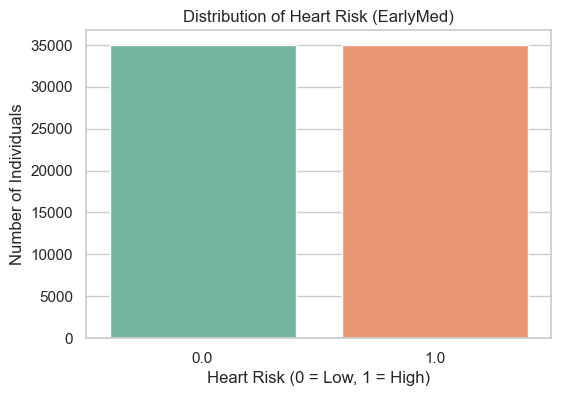

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Heart_Risk', data=heart_df, palette='Set2')
plt.title("Distribution of Heart Risk (EarlyMed)")
plt.xlabel("Heart Risk (0 = Low, 1 = High)")
plt.ylabel("Number of Individuals")
plt.show()


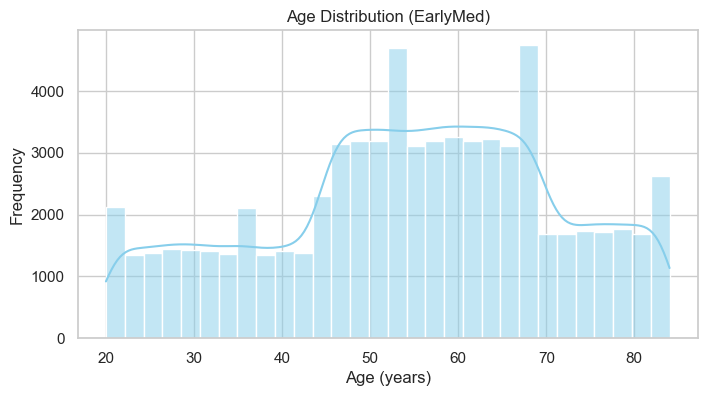

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(heart_df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution (EarlyMed)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()


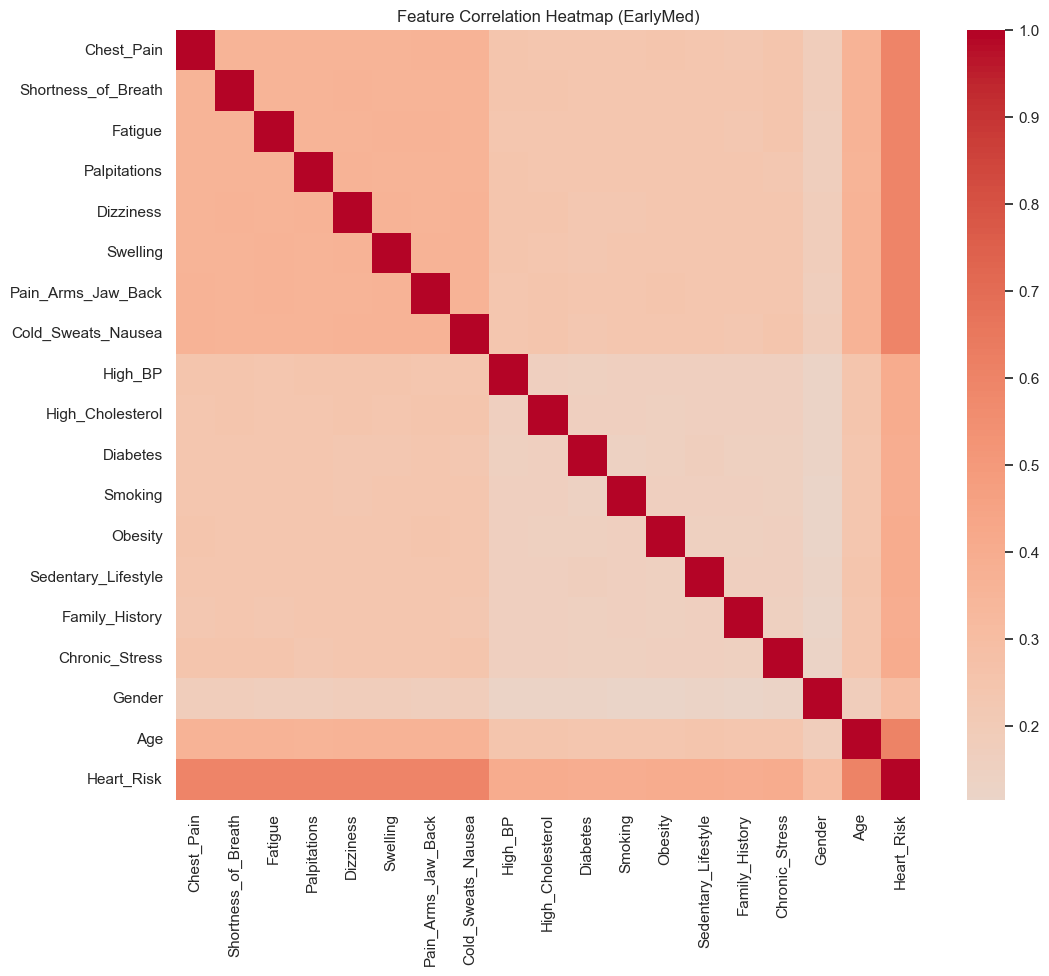

In [12]:
plt.figure(figsize=(12,10))
corr = heart_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap (EarlyMed)")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_21484\1100542914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hypertension', y='BMI', data=cardio_df, palette='Set3')


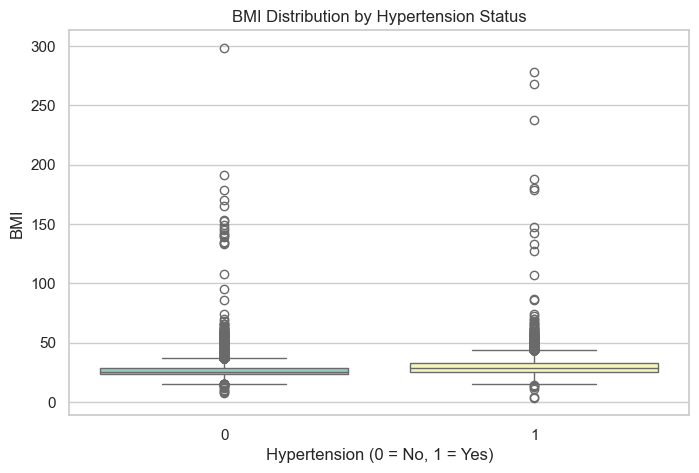

In [13]:
# Calculate BMI = weight (kg) / height (m)^2
cardio_df['BMI'] = cardio_df['weight'] / (cardio_df['height']/100)**2

plt.figure(figsize=(8,5))
sns.boxplot(x='Hypertension', y='BMI', data=cardio_df, palette='Set3')
plt.title("BMI Distribution by Hypertension Status")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()


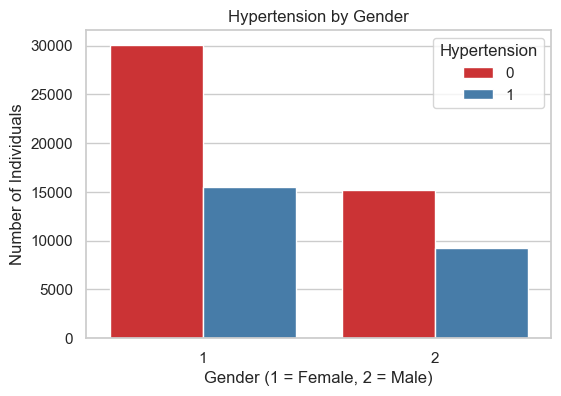

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='Hypertension', data=cardio_df, palette='Set1')
plt.title("Hypertension by Gender")
plt.xlabel("Gender (1 = Female, 2 = Male)")
plt.ylabel("Number of Individuals")
plt.legend(title="Hypertension")
plt.show()


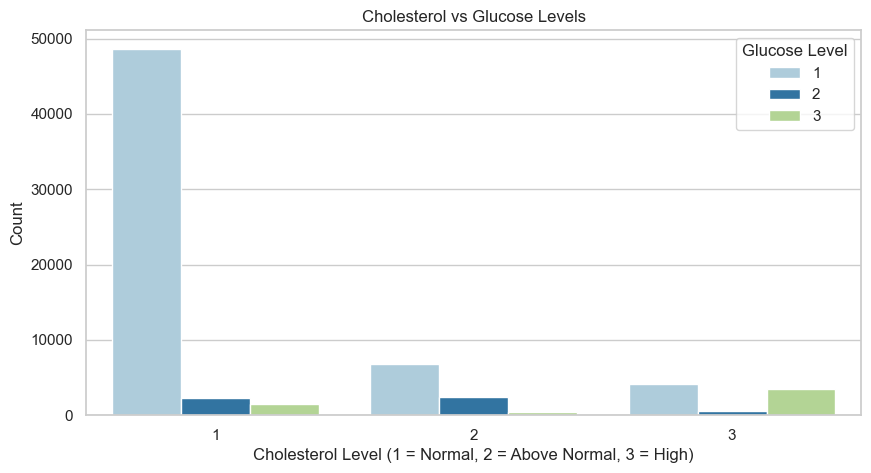

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='cholesterol', hue='gluc', data=cardio_df, palette='Paired')
plt.title("Cholesterol vs Glucose Levels")
plt.xlabel("Cholesterol Level (1 = Normal, 2 = Above Normal, 3 = High)")
plt.ylabel("Count")
plt.legend(title="Glucose Level")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_21484\2513524339.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Risk', y='Lifestyle_Risk', data=heart_df, palette='cool')


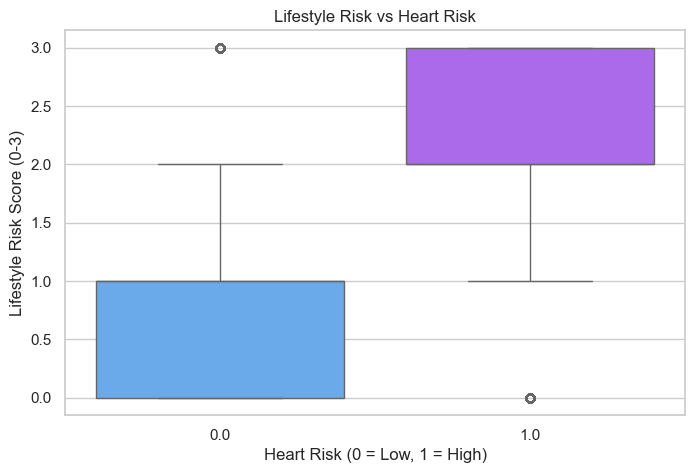

In [16]:
# Sum of lifestyle risk factors: Smoking + Sedentary_Lifestyle + Obesity
heart_df['Lifestyle_Risk'] = heart_df['Smoking'] + heart_df['Sedentary_Lifestyle'] + heart_df['Obesity']

plt.figure(figsize=(8,5))
sns.boxplot(x='Heart_Risk', y='Lifestyle_Risk', data=heart_df, palette='cool')
plt.title("Lifestyle Risk vs Heart Risk")
plt.xlabel("Heart Risk (0 = Low, 1 = High)")
plt.ylabel("Lifestyle Risk Score (0-3)")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_21484\882841697.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance, y=feat_importance.index, palette='magma')


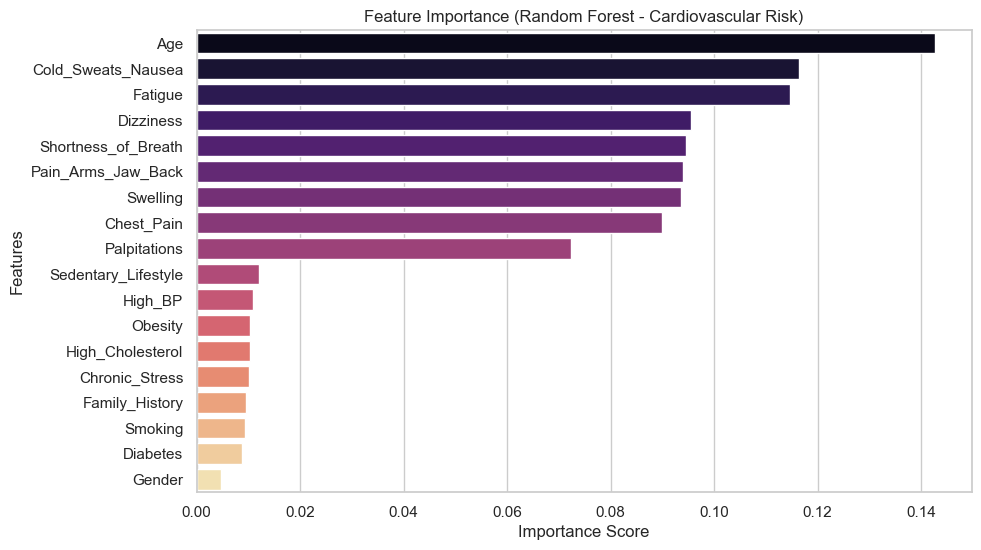

In [17]:
# Feature importance from trained Random Forest
importances = rf_risk.feature_importances_
features = X_risk.columns

feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette='magma')
plt.title("Feature Importance (Random Forest - Cardiovascular Risk)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [20]:
# Core libraries
import pandas as pd
import numpy as np
import joblib  # for loading saved models and scalers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
# Hypertension model
hypertension_model = joblib.load('hypertension_model.pkl')
hypertension_scaler = joblib.load('hypertension_scaler.pkl')

# Cardiovascular risk model
cardio_model = joblib.load('cardiovascular_risk_model.pkl')
cardio_scaler = joblib.load('cardiovascular_risk_scaler.pkl')


In [24]:
# Example: testing on new patient data
new_data = pd.DataFrame({
    'age': [55, 42],
    'bmi': [28.5, 31.2],
    'gender': [1, 2],
    'smoking': [0, 1],
    'diabetes': [1, 0],
    'cholesterol': [200, 180],
    'blood_pressure': [135, 120]
})


In [25]:
# Example: scaling numeric features
features_to_scale = ['age', 'bmi', 'cholesterol', 'blood_pressure']
new_data_scaled = new_data.copy()
new_data_scaled[features_to_scale] = hypertension_scaler.transform(new_data[features_to_scale])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- age
- blood_pressure
- bmi
Feature names seen at fit time, yet now missing:
- BMI
- active
- age_group_Adult
- age_group_Middle
- age_group_Senior
- ...
